In [1]:
import os
import torch
import torchaudio
import matplotlib.pyplot as plt
from src.metrics import *
from src.gest_segm import *
from src.dataset import *


def create_labels(directory, segment_duration, max_time, frame_size):
    """
    Crée les labels VAD et OSD segmentés à partir des fichiers RTTM dans un répertoire.
    Les labels VAD sont de la forme (num_segments, num_speaker, num_frames).
    Les labels OSD sont de la forme (num_segments, num_frames).

    Parameters:
    directory (str): Le répertoire contenant les fichiers RTTM.
    segment_duration (int): La durée de chaque segment en secondes.
    max_time (int): Le temps maximum de l'enregistrement en secondes.
    frame_size (float): La durée de chaque frame en secondes.

    Returns:
    np.ndarray: Labels VAD segmentés de forme (num_segments, num_speaker, num_frames).
    np.ndarray: Labels OSD segmentés de forme (num_segments, num_frames).
    """
    all_segments = get_segments_from_directory(directory)
    decoupled_segments = decoupe_segments(all_segments, segment_duration)

    num_speakers = len(set([seg[1] for seg in all_segments]))
    num_segments = int(np.ceil(max_time / segment_duration))
    num_frames_per_segment = int(segment_duration / frame_size)
    
    vad_labels = np.zeros((num_segments, num_speakers, num_frames_per_segment))
    osd_labels = np.zeros((num_segments, num_frames_per_segment))
    
    for i in range(num_segments):
        segment_start_time = i * segment_duration
        segment_end_time = segment_start_time + segment_duration
        current_segments = [
            seg for seg in decoupled_segments 
            if seg[2] < segment_end_time and (seg[2] + seg[3]) > segment_start_time
        ]
        
        vad_segment_labels = segments_to_vad_labels(current_segments, num_speakers, num_frames_per_segment, frame_size)
        osd_segment_labels = segments_to_osd_labels(current_segments, num_frames_per_segment, frame_size)
        
        vad_labels[i, :, :] = vad_segment_labels
        osd_labels[i, :] = osd_segment_labels

    return vad_labels, osd_labels


file_directory = 'amicorpus/ES2002c/audio'
rrtm_dir = 'annot_prepare/results/rttm'


segment_duration = tick = 4
max_time = 16
frame_size  = 0.1
all_segments = get_segments_from_directory(rrtm_dir)
waveform_segments, sample_rate = get_waveform(file_directory, segment_duration)

# vad_labels, osd_labels = create_labels(rrtm_dir, segment_duration , len(waveform_segments) * segment_duration , frame_size)

# print(vad_labels.shape)
# print(osd_labels.shape)
# print(len(waveform_segments))
# print(len(vad_labels[0][0]))










Processing amicorpus/ES2002c/audio/ES2002c.Array1-01.wav
Loaded amicorpus/ES2002c/audio/ES2002c.Array1-01.wav with sample rate 16000 and waveform shape torch.Size([1, 38778880])
Processing amicorpus/ES2002c/audio/ES2002c.Array1-02.wav
Loaded amicorpus/ES2002c/audio/ES2002c.Array1-02.wav with sample rate 16000 and waveform shape torch.Size([1, 38778880])
Processing amicorpus/ES2002c/audio/ES2002c.Array1-03.wav
Loaded amicorpus/ES2002c/audio/ES2002c.Array1-03.wav with sample rate 16000 and waveform shape torch.Size([1, 38778880])
Processing amicorpus/ES2002c/audio/ES2002c.Array1-04.wav
Loaded amicorpus/ES2002c/audio/ES2002c.Array1-04.wav with sample rate 16000 and waveform shape torch.Size([1, 38778880])
Processing amicorpus/ES2002c/audio/ES2002c.Array1-05.wav
Loaded amicorpus/ES2002c/audio/ES2002c.Array1-05.wav with sample rate 16000 and waveform shape torch.Size([1, 38778880])
Processing amicorpus/ES2002c/audio/ES2002c.Array1-06.wav
Loaded amicorpus/ES2002c/audio/ES2002c.Array1-06.wav 

Processing batch 1/10
  Processing segment: speaker_id=ES2002c.A, start=0.0, duration=4.0
    Current start: 0.0, end: 4.0, start_frame: 0, end_frame: 1
    Updated current_start: 0.1
    Current start: 0.1, end: 4.0, start_frame: 1, end_frame: 2
    Updated current_start: 0.2
    Current start: 0.2, end: 4.0, start_frame: 2, end_frame: 3
    Updated current_start: 0.30000000000000004
    Current start: 0.30000000000000004, end: 4.0, start_frame: 3, end_frame: 4
    Updated current_start: 0.4
    Current start: 0.4, end: 4.0, start_frame: 4, end_frame: 5
    Updated current_start: 0.5
    Current start: 0.5, end: 4.0, start_frame: 5, end_frame: 6
    Updated current_start: 0.6
    Current start: 0.6, end: 4.0, start_frame: 5, end_frame: 6
    Updated current_start: 0.7
    Current start: 0.7, end: 4.0, start_frame: 6, end_frame: 7
    Updated current_start: 0.7999999999999999
    Current start: 0.7999999999999999, end: 4.0, start_frame: 7, end_frame: 8
    Updated current_start: 0.8999

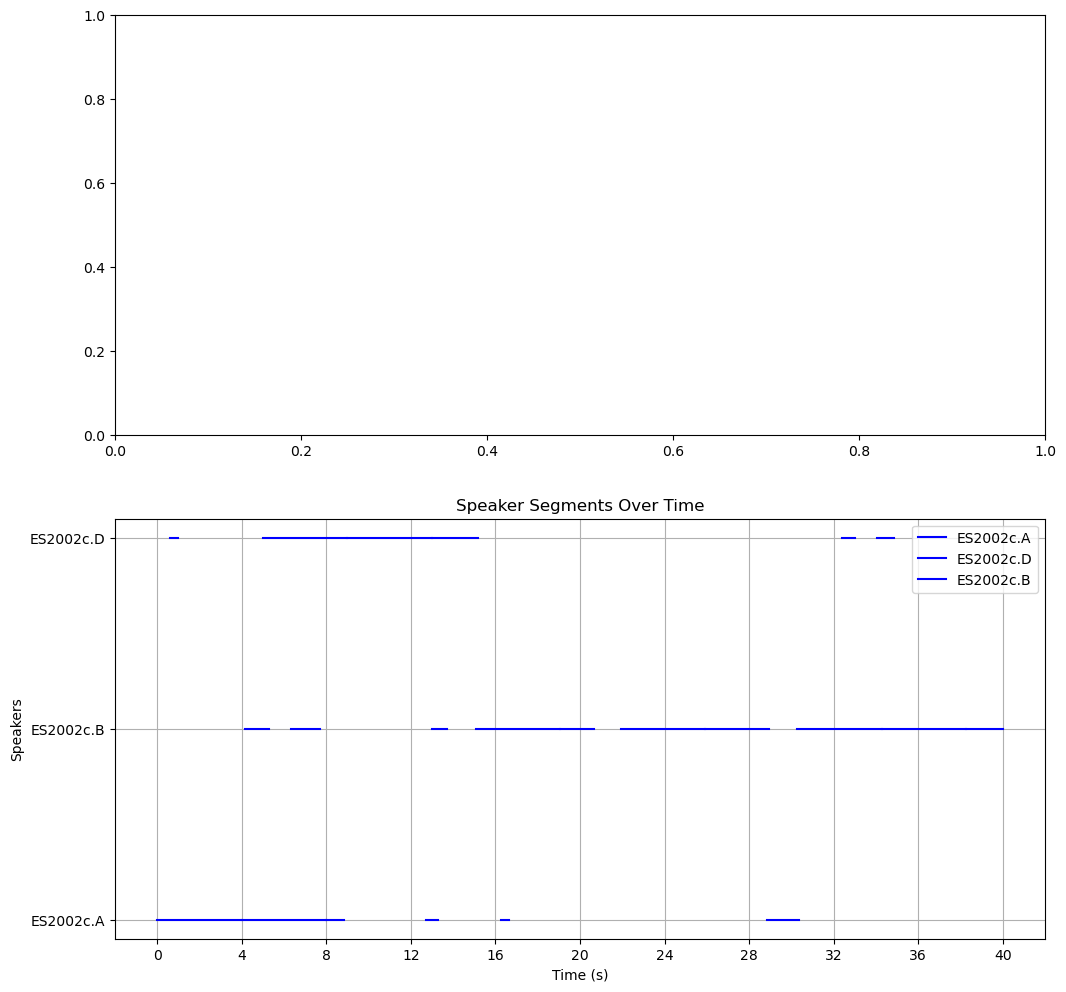

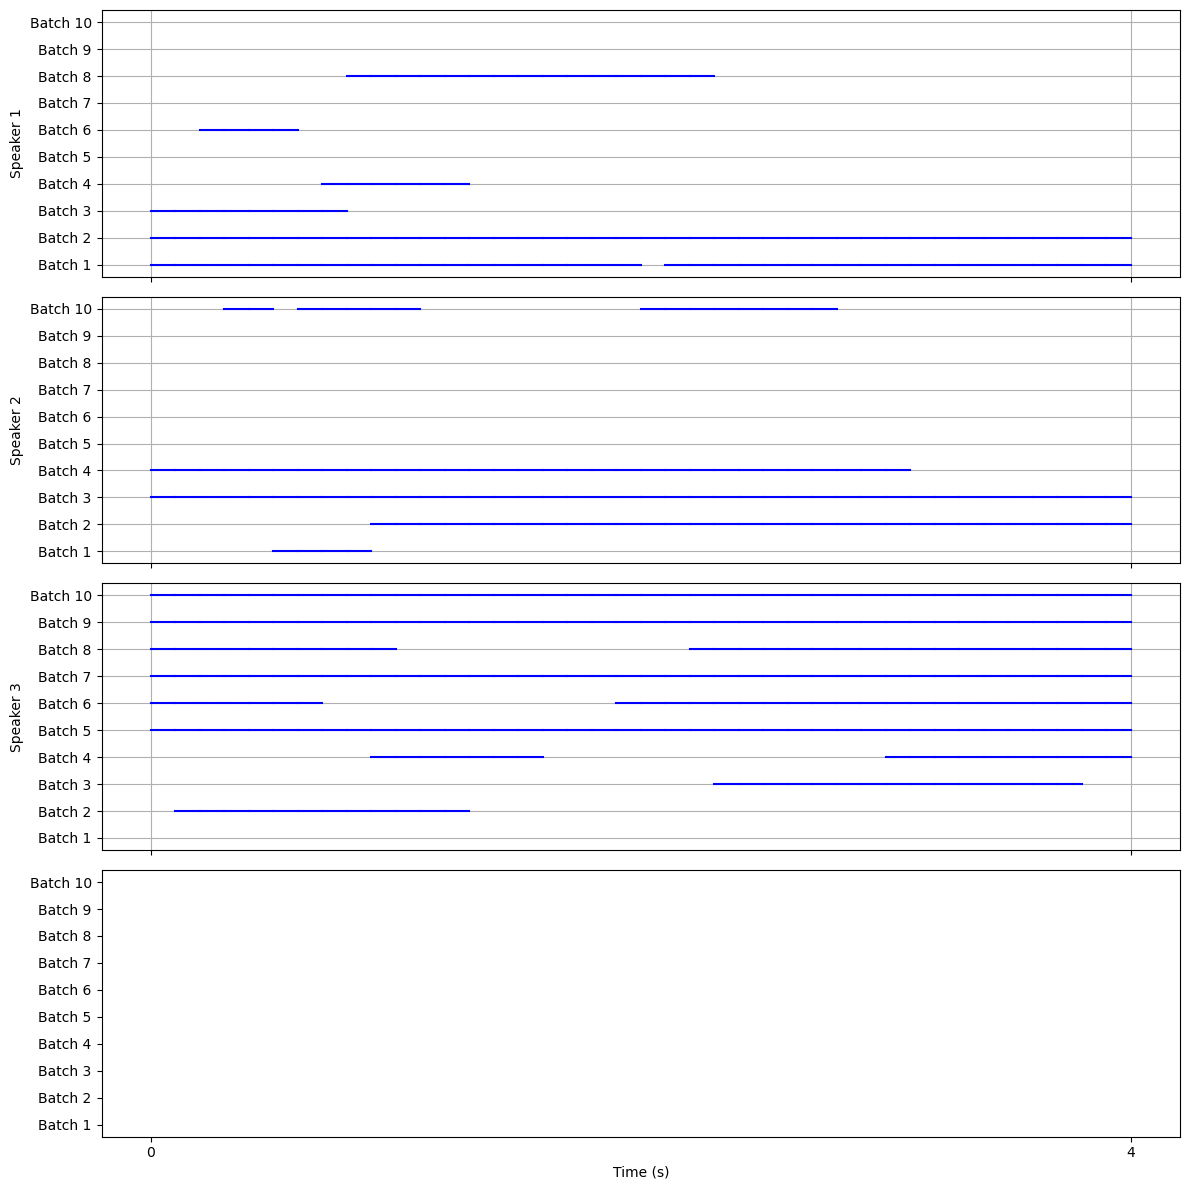

In [2]:





# plot_labels(vad_labels,frame_size, n_segments)

segments_nar = get_segments_from_directory(rrtm_dir)
filtered_segments = filter_segments_before_n_seconds(segments_nar, max_time)
decouped_segments = decoupe_segments(filtered_segments, segment_duration,max_time)
generated_labels = generate_vad_labels(decouped_segments, segment_duration, frame_size, num_speakers=4)

print(generated_labels.shape)
# label_via_func = segments_to_vad_labels(filtered_segments, 2, 200, 0.01)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
# plot_segments(filtered_segments, ax1, title="Speaker Segments Over Time")
plot_segments_dec(decouped_segments,segment_duration, ax2,tick)
plt.show()

plot_generated_labels(generated_labels, segment_duration, frame_size, max_time,tick)

